In [ ]:
# leer csv e importar librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cargar el dataset
data = pd.read_csv("../resources/data/Sleep_health_and_lifestyle_dataset.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [14]:
# promedio por grupo de edad 
bins = [20,29,39,49,100]
labels = ["20-29", "30-39", "40-49", "50+"]  

# agrupar datos
data["Age group"] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

# promedios
promedios = data.groupby("Age group")["Quality of Sleep"].mean()

tabla = promedios.reset_index().rename(columns={"Quality of Sleep": "Avg Quality of Sleep"})
print(tabla)

  Age group  Avg Quality of Sleep
0     20-29              5.789474
1     30-39              7.225352
2     40-49              6.965812
3       50+              8.166667


C:\Users\eobga\AppData\Local\Temp\ipykernel_12144\2961702898.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = data.groupby("Age group")["Quality of Sleep"].mean()


In [15]:
# correlacion de pearson
correlacion = data['Age'].corr(data["Quality of Sleep"])

print("Coeficiente de correlación:", correlacion)

Coeficiente de correlación: 0.4737338761619902


In [16]:
# Estadísticas descriptivas básicas
print("Distribución de Edad:")
print(data["Age"].describe())

print("\nDistribución de Horas de Sueño:")
print(data["Sleep Duration"].describe())

Distribución de Edad:
count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

Distribución de Horas de Sueño:
count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64


C:\Users\eobga\AppData\Local\Temp\ipykernel_12144\2605620878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Age group", y="Avg Quality of Sleep", data=tabla, palette="viridis")


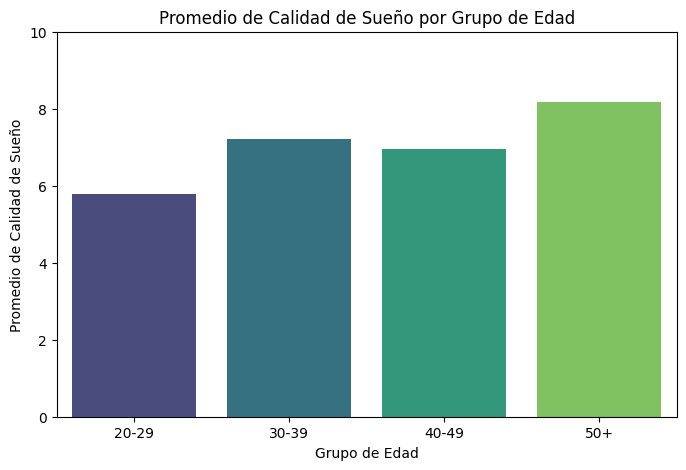

In [19]:
# grafica
plt.figure(figsize=(8,5))
sns.barplot(x="Age group", y="Avg Quality of Sleep", data=tabla, palette="viridis")

plt.title("Promedio de Calidad de Sueño por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Promedio de Calidad de Sueño")
plt.ylim(0, 10)  # asumiendo escala de 1 a 10
plt.show()